<a href="https://colab.research.google.com/github/Subham2S/ML-Kaggle-Weather-Dataset/blob/main/Group1_WeatherDataset_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment**

## Group No 1

## Group Member Names:
1. SUBHAM SHIT
2. AJAY PATHAK
3. ASNANI KAMLESH KUNDANLAL TARUNA

# **PART-A**

# **1. Import Libraries/Dataset**

In [43]:
import time
start_time = time.time()

In [44]:
!pip install opendatasets
!pip install pandas_profiling

## **1.a Downloading Dataset**

In [45]:
# The kaggle username and API - used for downloading the data
import opendatasets as od
dataset_url = "https://www.kaggle.com/muthuj7/weather-dataset"
od.download(dataset_url, force=True)

100%|██████████| 2.23M/2.23M [00:00<00:00, 104MB/s]

## **1.b Importing Libraries/Packages**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import warnings
# Packages related to general operating system & warnings
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
import statsmodels.formula.api as smf
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.impute import MissingIndicator, SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas_profiling
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import warnings
from scipy.stats import shapiro, anderson, kurtosis
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

warnings.filterwarnings('ignore')

# Packages related to data importing, manipulation, exploratory data analysis, data understanding

# Packages related to data visualizaiton
%matplotlib inline

# Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6, 3))
plt.gray()

%matplotlib inline
sns.set(style='ticks', font_scale=1.2)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

from itertools import combinations as cm
from sklearn.impute import KNNImputer

<Figure size 600x300 with 0 Axes>

# **2. Data Visualization and Exploration**

### Converting the above downloaded data into a dataframe

In [47]:
df_weather = pd.read_csv("/content/weather-dataset/weatherHistory.csv")

## **2.a Displaying the first 5 and last 5 records**

In [48]:
# First Five Records
df_weather.head(5)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [49]:
# Last Five Records
df_weather.tail()

Formatted Date        Summary Precip Type  \
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
96448                    31.0          16.1000         0.0   
96449                    20.0          15.5526         0.0   
96450                    30.0          16.1000         0.0   
96451                    20.0          16.1000         0.0   
96452                    39.0          15.5204         0.0   

       Pressure (millibars)                           Daily Summary  
96448               1014.36  Partly cloudy starting in the morning.  
96449               1015.16  Partly cloudy starting in the morning.  
96450               1015.66  Partly cloudy starting in the morning.  
96451               1015.95  Partly cloudy starting in the morning.  
96452               1016.16  Partly cloudy starting in the morning.

## **2.b Description and Shape of Dataset**

In [50]:
# Column Headings
print('\nColumn Headings:\n', df_weather.columns)

# Description - Statistical Information
print('\nDescription:')
print('\nInfo:\n')
print(df_weather.info())

print('\nShape:\n', df_weather.shape)
print('\nStatistical Information:\n')
df_weather.describe()


Column Headings:
 Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

Description:

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)     

Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

### **Detailed Statistical Summary**

In [51]:
# Categorigal Variables
cat_cols = df_weather.select_dtypes(['object']).columns.to_list()
for i in cat_cols:
    df_weather[i] = pd.Categorical(df_weather[i])

# Continuous Variables
conti_cols = df_weather.select_dtypes(['int64', 'float64']).columns.to_list()

In [52]:
# Creating UDFs for personalised summary
def conti_var_summary(x):
    '''
    UDF for getting customised summary for continuous variables
    '''
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total

    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr

    return pd.Series([
        x.dtype,
        x.nunique(), n_total,
        x.count(), n_miss, perc_miss,
        x.sum(),
        x.mean(),
        x.std(),
        x.var(), lc_iqr, uc_iqr,
        x.min(),
        x.quantile(0.01),
        x.quantile(0.05),
        x.quantile(0.10),
        x.quantile(0.25),
        x.quantile(0.5),
        x.quantile(0.75),
        x.quantile(0.90),
        x.quantile(0.95),
        x.quantile(0.99),
        x.max()
    ],
        index=[
        'dtype', 'cardinality', 'n_tot', 'n', 'nmiss',
        'perc_miss', 'sum', 'mean', 'std', 'var', 'lc_iqr',
        'uc_iqr', 'min', 'p1', 'p5', 'p10', 'p25', 'p50',
                         'p75', 'p90', 'p95', 'p99', 'max'
    ])


def cat_var_summary(x):
    '''
    UDF for getting customised summary for categorical variables
    '''
    Mode = x.value_counts().sort_values(ascending=False)[0:1].reset_index()
    return pd.Series([
        x.count(),
        x.nunique(),
        x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1],
        round(Mode.iloc[0, 1] * 100 / x.count(), 2)
    ],
        index=['N', 'CARDINALITY', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

#### **Continuous Variables:**

In [53]:
df_weather.select_dtypes(['int64','float64']).apply(conti_var_summary)

Temperature (C) Apparent Temperature (C)  Humidity  \
dtype               float64                  float64   float64   
cardinality            7574                     8984        90   
n_tot                 96453                    96453     96453   
n                     96453                    96453     96453   
nmiss                     0                        0         0   
perc_miss               0.0                      0.0       0.0   
sum          1150942.633333                1047000.1  70883.21   
mean              11.932678                10.855029  0.734899   
std                9.551546                10.696847  0.195473   
var               91.232037               114.422544   0.03821   
lc_iqr           -16.536111               -22.480556     0.165   
uc_iqr            40.063889                43.630556     1.325   
min              -21.822222               -27.716667       0.0   
p1                -7.744444               -11.505556      0.27   
p5                -2.766667                -6.041111      0.35   
p10               -0.126667                -3.311111      0.43   
p25                4.688889                 2.311111       0.6   
p50                    12.0                     12.0      0.78   
p75               18.838889                18.838889      0.89   
p90               24.905556                24.905556      0.95   
p95               27.777778                27.933333      0.97   
p99               32.755556                32.811111       1.0   
max               39.905556                39.344444       1.0   

            Wind Speed (km/h) Wind Bearing (degrees) Visibility (km)  \
dtype                 float64                float64         float64   
cardinality              2484                    360             949   
n_tot                   96453                  96453           96453   
n                       96453                  96453           96453   
nmiss                       0                      0               0   
perc_miss                 0.0                    0.0             0.0   
sum              1042718.6735             18085828.0     998030.5314   
mean                 10.81064             187.509232       10.347325   
std                  6.913571             107.383428        4.192123   
var                 47.797464           11531.200691       17.573897   
lc_iqr                -6.6332                 -145.0         -1.3685   
uc_iqr                26.5972                  551.0         24.5203   
min                       0.0                    0.0             0.0   
p1                        0.0                    0.0           0.161   
p5                     2.5277                   10.0           1.932   
p10                    3.2039                   24.0           4.025   
p25                    5.8282                  116.0          8.3398   
p50                    9.9659                  180.0         10.0464   
p75                   14.1358                  290.0          14.812   
p90                   20.4148                  329.0         15.8263   
p95                  24.43014                  341.0            16.1   
p99                   32.8601                  356.0            16.1   
max                   63.8526                  359.0            16.1   

            Loud Cover Pressure (millibars)  
dtype          float64              float64  
cardinality          1                 4979  
n_tot            96453                96453  
n                96453                96453  
nmiss                0                    0  
perc_miss          0.0                  0.0  
sum                0.0          96765117.65  
mean               0.0          1003.235956  
std                0.0           116.969906  
var                0.0         13681.958835  
lc_iqr             0.0              998.115  
uc_iqr             0.0             1034.875  
min                0.0                  0.0  
p1                 0.0                  0.0  
p5      

#### **Categorical Variables:**

In [54]:
df_weather.select_dtypes(['category']).apply(cat_var_summary)

Formatted Date        Summary Precip Type  \
N                                    96453          96453       95936   
CARDINALITY                          96429             27           2   
NMISS                                    0              0         517   
MODE         2010-08-02 14:00:00.000 +0200  Partly Cloudy        rain   
FREQ                                     2          31733       85224   
PERCENT                                0.0           32.9       88.83   

                                 Daily Summary  
N                                        96453  
CARDINALITY                                214  
NMISS                                        0  
MODE         Mostly cloudy throughout the day.  
FREQ                                     20085  
PERCENT                                  20.82

> Here **`Formatted Date`, `Daily Summary`** are having very high cardinality. Hence, these columns may consume high computational resources while building regression models. So, we have to drop these columns at the time of final feature selection later.

## **2.c Data Visualization through plots & Insights (skewness, median, distribution)**

In [55]:
# Creating a UDF to add median labels :
def add_median_labels(ax, fmt='.1f'):
    '''
    This function adds median labels at any orientation
    '''
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())

        # Choosing value depending on horizontal or vertical plot orientation :
        value = x if (median.get_xdata()[1] -
                      median.get_xdata()[0]) == 0 else y
        text = ax.text(x,
                       y,
                       f'{value:{fmt}}',
                       ha='center',
                       va='center',
                       fontweight='bold',
                       color='white')

        # Creating median-colored border around white text for contrast :
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

Summary
SUMMARY


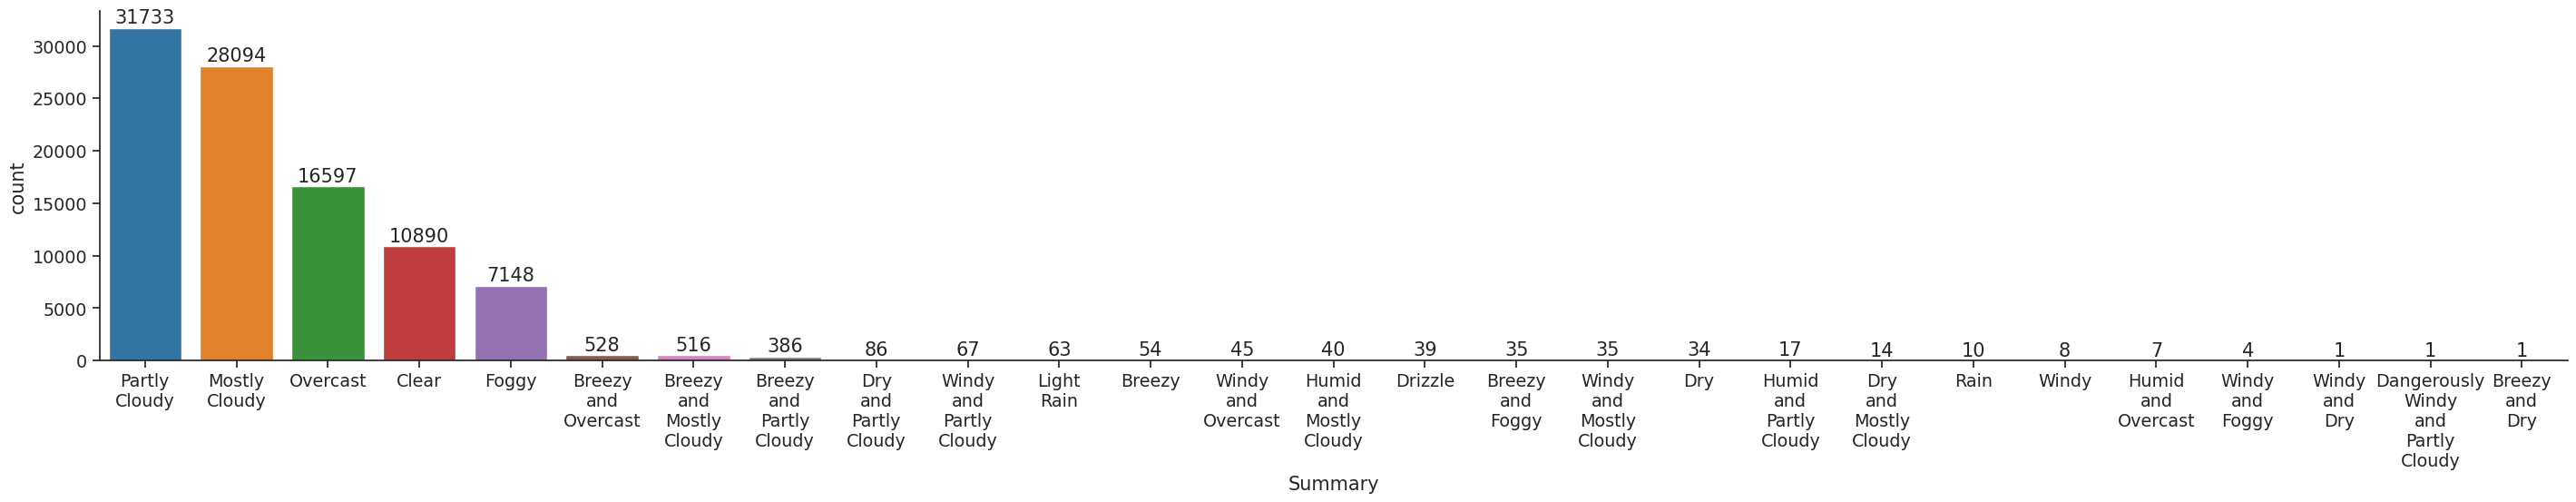

Precip Type
PRECIP TYPE


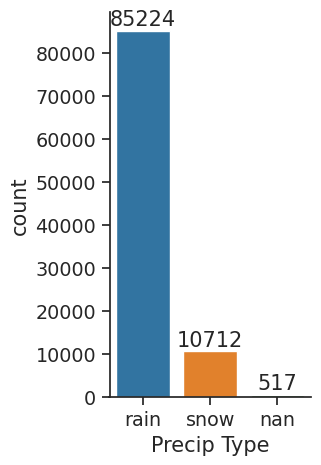

TEMPERATURE (C)
skewness = 0.09412658235198375


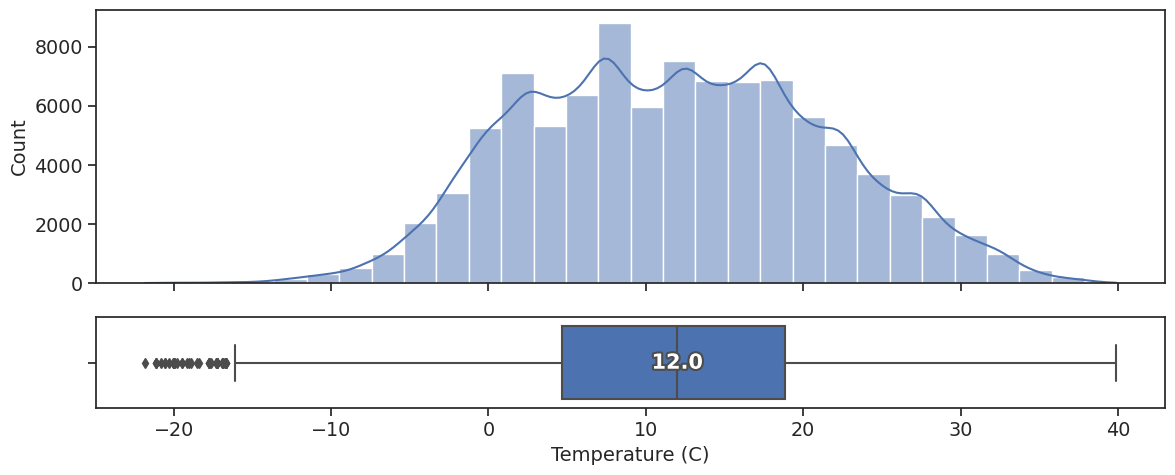

APPARENT TEMPERATURE (C)
skewness = -0.05730229860439617


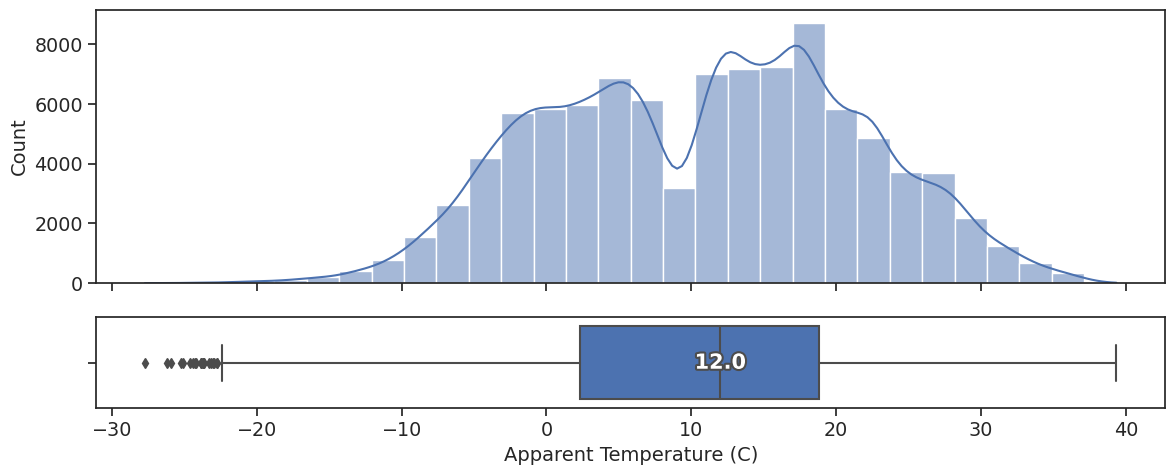

HUMIDITY
skewness = -0.715880427565631


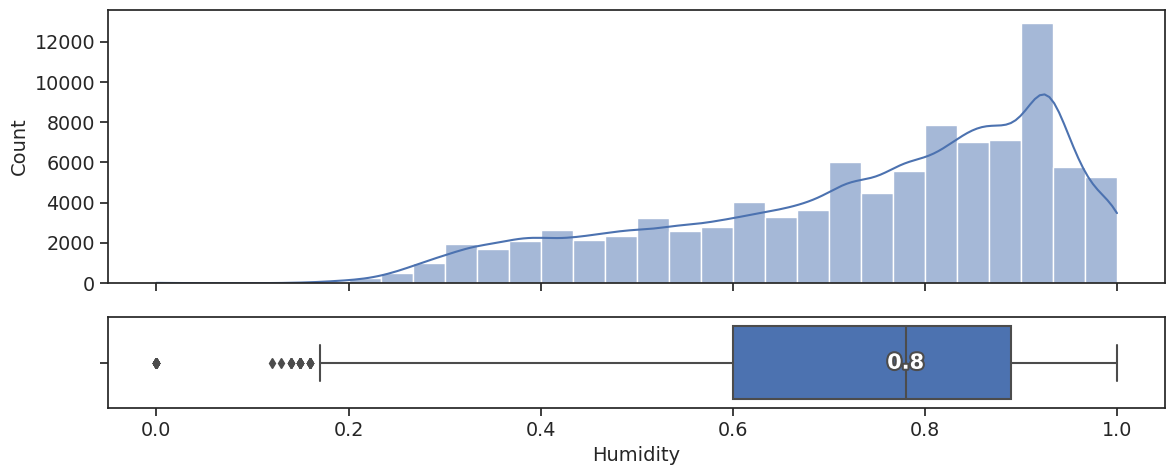

WIND SPEED (KM/H)
skewness = 1.1134929678251166


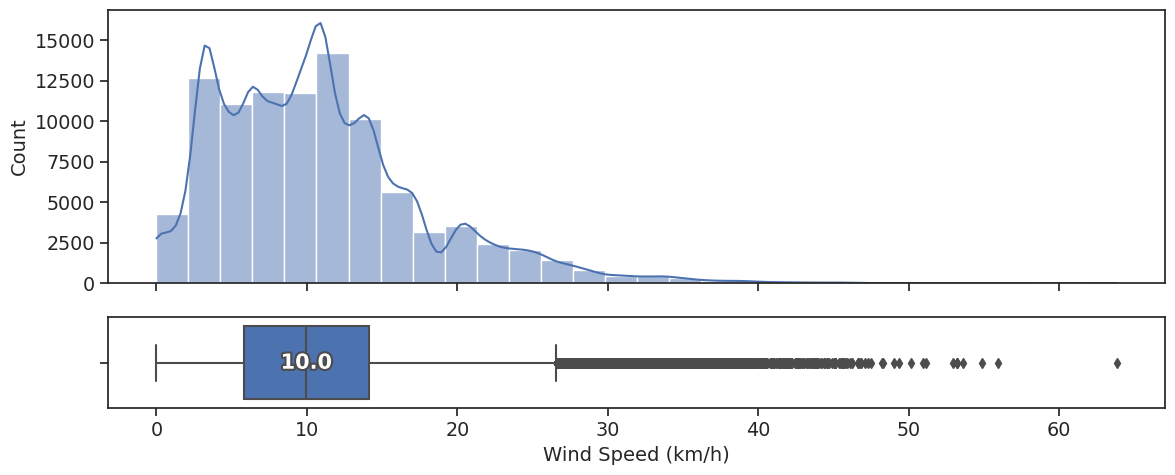

WIND BEARING (DEGREES)
skewness = -0.15464320132703985


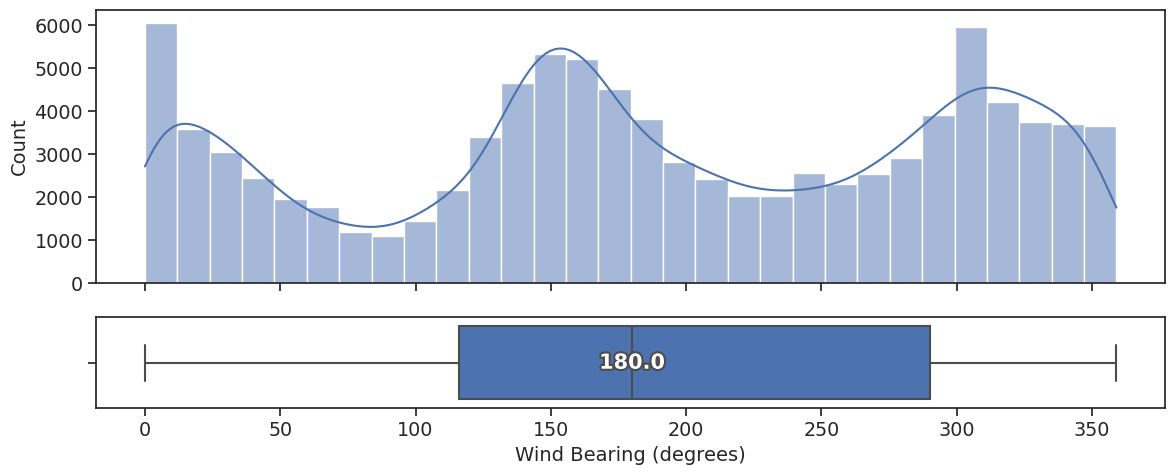

VISIBILITY (KM)
skewness = -0.4987118639375199


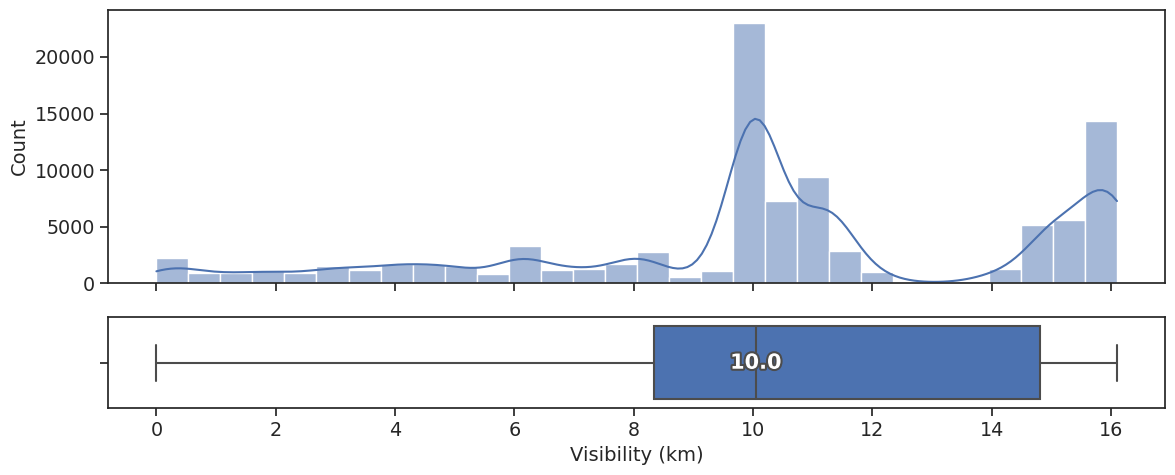

LOUD COVER
skewness = 0


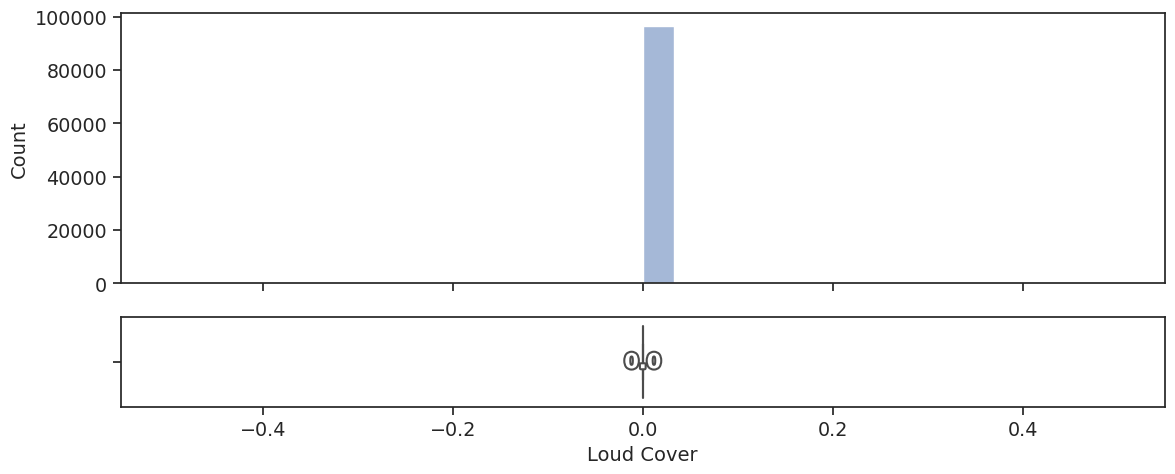

PRESSURE (MILLIBARS)
skewness = -8.422506486163188


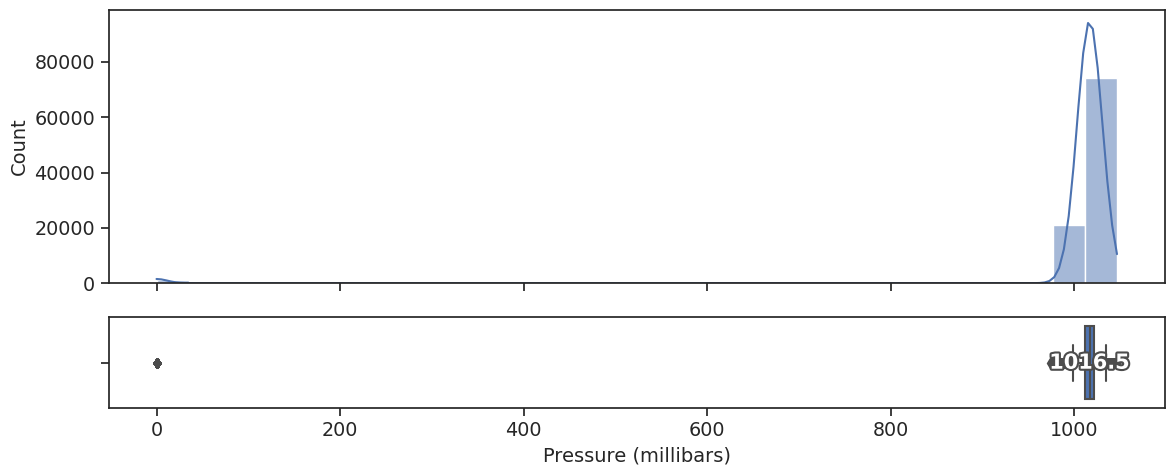

In [56]:
df = df_weather.copy()
cat_cols = df_weather.select_dtypes(['category']).columns
for i in df.columns:

    # Plotting for Continuous variables :
    if i in conti_cols:

        # Printing Skewness :
        print(i.upper(), '\nskewness = ', df.loc[:, i].skew(), sep='')

        # Setting rcParams :
        params = {'figure.figsize': (12, 5), 'axes.labelsize': 14}
        plt.rcParams.update(params)

        # Plotting histplot and boxplot :
        fig, axs = plt.subplots(2,
                                1,
                                sharex=True,
                                gridspec_kw={'height_ratios': [3, 1]})
        sns.histplot(data=df, x=i, kde=True, ax=axs[0], bins=30)
        g = sns.boxplot(x=df.loc[:, i], ax=axs[1], saturation=1)
        add_median_labels(g)
        fig.tight_layout()

        plt.show()

    # Plotting for Categorical variables :
    elif (i in cat_cols) and (df[i].nunique()<=50):

        print(i)

        # Setting rcParams :
        params = {
            'figure.figsize': (df[i].nunique() * 1.3, 5),
            'axes.labelsize': 14
        }
        plt.rcParams.update(params)
        sns.set(style='ticks', font_scale=1.25)

        # PLotting :
        print(i.upper())
        df[i] = df[i].astype(str)
        df[i] = df[i].str.replace(' ', '\n')
        plots = sns.countplot(x=i,
                              data=df,
                              order=df[i].value_counts().index,
                              palette='tab10')
        sns.despine()

        # Annonating :
        for bar in plots.patches:
            plots.annotate(
                str(format(bar.get_height(), '.0f')),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center',
                va='center',
                size=15,
                xytext=(0, 8),
                textcoords='offset points')
        df[i] = df[i].str.replace('\n', ' ')

        # Converting back to categorical :
        df[i] = df[i].astype('category')

    else:
        pass
    plt.show()

*We have skipped the **`countplot`** of `Daily Summary` column as it contains high cardinality so it will not fit the plot frame. Anyways, the inference from this column won't be useful in the analysis due to textual nature of the data.*
<br>
<br>
## **2.d Insights Observed**
**INSIGHTS ON TARGET VARIABLE**
<br>
HUMIDITY<br>
skewness = -0.715880427565631
<br>
The Target variable is left-skewed, not normally distributed. Hence, we need to perform logarithmic transformation before building the linear-regression model.<br>
<br>


**Outliers**<br>
There are many numeric columns having outliers which will be addressed in the data cleaning step.<br>
1. Lower : **`['Pressure (millibars)','Temperature (C)','Apparent Temperature (C)','Humidity']`**
2. Upper : **`['Wind Speed (km/h)','Pressure (millibars)']`**
<br>
**Skewness**<br>
There are many columns having normal distributions (viz. TEMPERATURE etc.) but there are few with skewed distributions as well (viz. PRESSURE, WIND SPEED etc).<br>
<br>
**Zero Variation**<br>
Loud Cover has zero standard deviation, so this column has to be removed before finalising the feature columns, as there is no information gain from this column.

## **3. Data Pre-Processing and Cleaning**

## **3.a Pre-Processing**

### Missing Issue

In [57]:
# Checking for Missing data :
df_weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [58]:
threshold = 0.5

# Dropping columns where missing value rate are higher than threshold
df_weather = df_weather[df_weather.columns[df_weather.isnull().mean() <= threshold]]

# Dropping rows where missing value rate are higher than threshold
df_weather = df_weather.loc[df_weather.isnull().mean(axis=1) <= threshold]

print('SHAPE:\n', df_weather.shape, sep='')

SHAPE:
(96453, 12)


In [59]:
df_weather.dropna(inplace=True)
print('Shape after removing NULLs :', df_weather.shape)

Shape after removing NULLs : (95936, 12)


### Duplicate Issue

In [60]:
# Checking for Duplicated data :
print(f'Total No. of duplicates : {df_weather.duplicated().sum()} out of {df_weather.shape[0]} records.')

Total No. of duplicates : 24 out of 95936 records.


In [61]:
print('Shape before removing duplicates :', df_weather.shape)
df_weather.drop_duplicates(inplace=True)
print('Shape after removing duplicates :', df_weather.shape)

Shape before removing duplicates : (95936, 12)
Shape after removing duplicates : (95912, 12)


### Outliers Issue

>**Important Observation**<br>
The above data contains outliers on several columns. So, outliers must be treated as per IQR method.

In [62]:
# Lower Outlier Treatment using p01 capping values:
l_cols = ['Pressure (millibars)','Temperature (C)','Apparent Temperature (C)','Humidity']
df_weather.loc[:,l_cols] = df_weather.loc[:,l_cols].apply(
    lambda x: x.clip(lower=x.quantile(0.01)\
                     if x.quantile(0.01)>(x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25)))\
                     else (x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25)))))

# Upper Outlier Treatment using p01 capping values:
u_cols = ['Wind Speed (km/h)','Pressure (millibars)']
df_weather.loc[:,u_cols] = df_weather.loc[:,u_cols].apply(
    lambda x: x.clip(upper=x.quantile(0.99)\
                     if x.quantile(0.99)<(x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25)))\
                     else (x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25)))))

df_weather.select_dtypes(['int64','float64']).apply(conti_var_summary)

Temperature (C) Apparent Temperature (C)  Humidity  \
dtype               float64                  float64   float64   
cardinality            7124                     8384        74   
n_tot                 95912                    95912     95912   
n                     95912                    95912     95912   
nmiss                     0                        0         0   
perc_miss               0.0                      0.0       0.0   
sum          1147658.888889           1044665.466667  70517.32   
mean              11.965749                10.891916  0.735229   
std                9.504515                10.639002  0.194708   
var               90.335805               113.188356  0.037911   
lc_iqr           -16.780556               -22.586111     0.165   
uc_iqr            40.219444                43.702778     1.325   
min               -7.755556               -11.522222      0.27   
p1                -7.755556               -11.522222      0.27   
p5                -2.777778                -6.055556      0.35   
p10               -0.138889                -3.333333      0.43   
p25                4.594444                 2.272222       0.6   
p50               12.022222                12.022222      0.78   
p75               18.844444                18.844444      0.89   
p90               24.916667                24.916667      0.95   
p95               27.785833                    27.95      0.97   
p99               32.755556                32.816667       1.0   
max               39.905556                39.344444       1.0   

            Wind Speed (km/h) Wind Bearing (degrees) Visibility (km)  \
dtype                 float64                float64         float64   
cardinality              1654                    360             949   
n_tot                   95912                  95912           95912   
n                       95912                  95912           95912   
nmiss                       0                      0               0   
perc_miss                 0.0                    0.0             0.0   
sum             1021742.18475             17984170.0     993869.5025   
mean                10.652913             187.506986       10.362306   
std                  6.450062             107.378309        4.174204   
var                 41.603302           11530.101337       17.423982   
lc_iqr               -6.67345                 -145.0        -1.32825   
uc_iqr               26.62135                  551.0        24.49615   
min                       0.0                    0.0             0.0   
p1                        0.0                    0.0           0.161   
p5                     2.5277                   10.0          2.0125   
p10                    3.2039                   24.0           4.025   
p25                    5.8121                  116.0          8.3559   
p50                    9.9337                  180.0         10.0464   
p75                   14.1358                  290.0          14.812   
p90                   20.4148                  329.0         15.8263   
p95                   24.4559                  341.0            16.1   
p99                  26.62135                  356.0            16.1   
max                  26.62135                  359.0            16.1   

            Loud Cover Pressure (millibars)  
dtype          float64              float64  
cardinality          1                 3642  
n_tot            95912                95912  
n                95912                95912  
nmiss                0                    0  
perc_miss          0.0                  0.0  
sum                0.0          97498700.57  
mean               0.0          1016.543296  
std                0.0             7.712047  
var                0.0            59.475665  
lc_iqr             0.0               998.15  
uc_iqr             0.0              1034.79  
min                0.0               998.15  
p1                 0.0               998.15  
p5      

#### Redundancy Test

There are no inconsistencies remaining as such, all numericals are in `float64` and outliers are also removed. However, we can perform redundancy test here as well to check whether any two columns have duplicate data or not.

In [63]:
# Creating Type Convertion UDFs :
def cat_obj(x): return x.astype('object')
def obj_cat(x): return x.astype('category')


# Creating a function to check redundancy :
def check_col_redundancies(df):
    '''
    This function checks if two columns in a df have identical data or not.
    '''
    red_list = []

    # Category to Object :
    df[df.select_dtypes(['category']).columns] = df.select_dtypes(
        ['category']).apply(cat_obj)

    for i in list(cm(df.columns, 2)):
        if all(df[i[0]] == df[i[1]]):
            red_list.append(i)
            print('{} = {}'.format(*i))

    # Object to Category :
    df[df.select_dtypes(['object']).columns] = df.select_dtypes(
        ['object']).apply(obj_cat)

    return red_list, df


red_cols, df_weather = check_col_redundancies(df_weather)
print('All columns have different inferences.' if len(red_cols) == 0 else '')

to_drop = []
for i in red_cols:
    if (i[0] in to_drop) | (i[1] in to_drop):
        continue
    else:
        if len(i[0]) < len(i[1]):

            to_drop.append(i[1])
        else:
            to_drop.append(i[0])

display(to_drop)

# Dropping Redundancies :
df_weather.drop(columns=to_drop, inplace=True)
df_weather.shape

All columns have different inferences.


[]

(95912, 12)

## **3.b Feature Transfomation Techniques**

### Target Distribution Check

<Axes: xlabel='Humidity', ylabel='Density'>

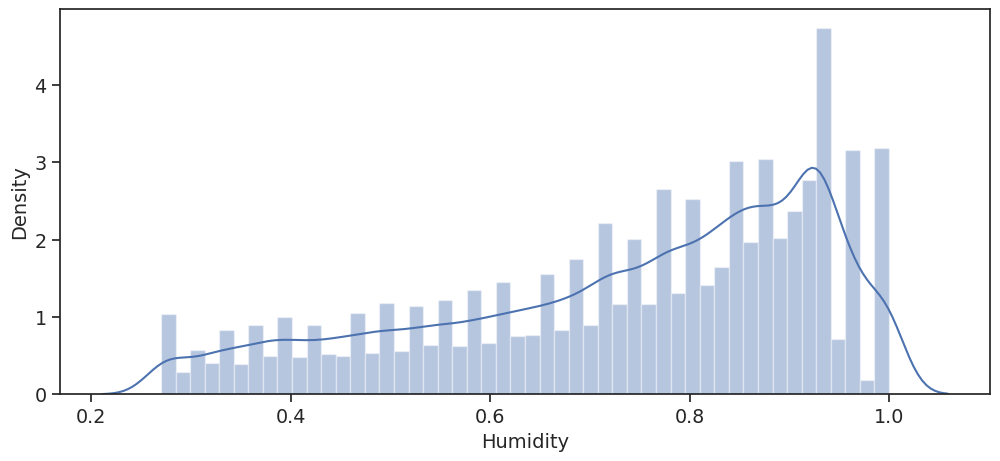

In [64]:
# Cheking the Target Variable distribution
sns.distplot(df_weather['Humidity'])

<Axes: xlabel='target', ylabel='Density'>

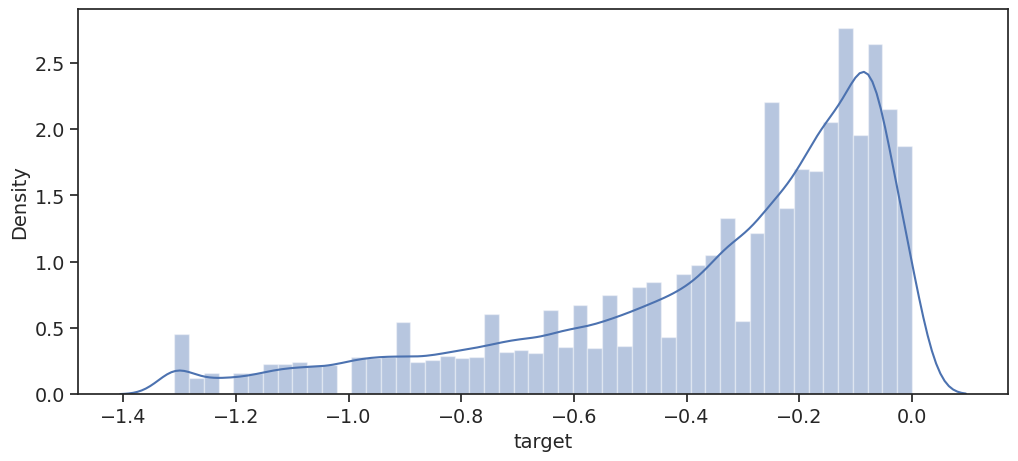

In [65]:
# Applying Transformation in the Target Column : Humidity to make it into Near normal
df_weather['target'] = np.log(df_weather['Humidity'])
sns.distplot(df_weather['target'])

This tranformation is not justified as the skewness is still persisting after transformation, hence no transformation is useful in this case.

In [66]:
df_weather.drop(columns=['target'], inplace=True)

### Standardization of different features

In [67]:
cols = df_weather.select_dtypes(['int64','float64']).columns
scaling_methods = ['zscore', 'zscore', 'robust', 'zscore', 'min-max', 'zscore', 'NONE', 'robust']
for x, y in zip(cols, scaling_methods):
    print(x,'-', y)

Temperature (C) - zscore
Apparent Temperature (C) - zscore
Humidity - robust
Wind Speed (km/h) - zscore
Wind Bearing (degrees) - min-max
Visibility (km) - zscore
Loud Cover - NONE
Pressure (millibars) - robust


In [68]:
def get_standardised_column(column_data, scaling_method):
    scaling_methods = ['zscore', 'mad', 'pca', 'min-max', 'robust']
    if scaling_method in scaling_methods:
        if scaling_method == 'zscore':
            std = column_data.std()
            scaled_data = (column_data - column_data.mean()) / std

        elif scaling_method == 'mad':
            mad = column_data.mad()
            scaled_data = (column_data - column_data.median()) /mad

        elif scaling_method == 'pca':
            pca = PCA(n_components=1)
            scaled_data = pca.fit_transform(column_data.values.reshape(-1, 1))

        elif scaling_method == 'min-max':
            scaled_data = (column_data - column_data.min()) / (column_data.max() - column_data.min())

        elif scaling_method == 'robust':
            scaler = RobustScaler()
            scaled_data = scaler.fit_transform(column_data.values.reshape(-1, 1))

    else:
        scaled_data = column_data

    return scaled_data

for col, scaling_method in zip(cols, scaling_methods):
    df_weather[col] = get_standardised_column(df_weather[col], scaling_method)

In [69]:
df_weather.select_dtypes(['int64','float64']).apply(conti_var_summary)

Temperature (C) Apparent Temperature (C)      Humidity  \
dtype               float64                  float64       float64   
cardinality            7124                     8384            74   
n_tot                 95912                    95912         95912   
n                     95912                    95912         95912   
nmiss                     0                        0             0   
perc_miss               0.0                      0.0           0.0   
sum                     0.0                     -0.0 -14807.034483   
mean                    0.0                     -0.0     -0.154381   
std                     1.0                      1.0      0.671406   
var                     1.0                      1.0      0.450786   
lc_iqr            -3.024489                -3.146726      -2.12069   
uc_iqr              2.97266                 3.084017       1.87931   
min               -2.074941                 -2.10679     -1.758621   
p1                -2.074941                 -2.10679     -1.758621   
p5                -1.551213                -1.592957     -1.482759   
p10               -1.273567                -1.337085     -1.206897   
p25               -0.775558                -0.810198      -0.62069   
p50                0.005942                 0.106242           0.0   
p75                0.723729                 0.747488       0.37931   
p90                1.362607                 1.318239      0.586207   
p95                1.664481                 1.603354      0.655172   
p99                2.187361                  2.06079      0.758621   
max                2.939635                 2.674361      0.758621   

            Wind Speed (km/h) Wind Bearing (degrees) Visibility (km)  \
dtype                 float64                float64         float64   
cardinality              1654                    360             949   
n_tot                   95912                  95912           95912   
n                       95912                  95912           95912   
nmiss                       0                      0               0   
perc_miss                 0.0                    0.0             0.0   
sum                       0.0           50095.181058             0.0   
mean                      0.0               0.522304             0.0   
std                       1.0               0.299104             1.0   
var                       1.0               0.089463             1.0   
lc_iqr              -2.686232                -0.4039       -2.800667   
uc_iqr               2.475703               1.534819        3.385997   
min                 -1.651598                    0.0       -2.482463   
p1                  -1.651598                    0.0       -2.443892   
p5                  -1.259711               0.027855       -2.000335   
p10                 -1.154875               0.066852       -1.518207   
p25                 -0.750506                0.32312       -0.480668   
p50                 -0.111505               0.501393       -0.075681   
p75                  0.539977               0.807799        1.065998   
p90                  1.513456               0.916435        1.308991   
p95                  2.139977               0.949861         1.37456   
p99                  2.475703               0.991643         1.37456   
max                  2.475703                    1.0         1.37456   

            Loud Cover Pressure (millibars)  
dtype          float64              float64  
cardinality          1                 3642  
n_tot            95912                95912  
n                95912                95912  
nmiss                0                    0  
perc_miss          0.0                  0.0  
sum                0.0          1290.996725  
mean               0.0              0.01346  
std                0.0             0.841926  
var                0.0              0.70884  
lc_iqr             0.0            -1.994541  
uc_iqr             0.0             2.005459  
min 

### Encoding Features (One-Hot-Encoding)
*Label Encoding wound not be applicable as we don't have any ordinal variables.*

In [70]:
target = 'Humidity'
final_cal_cols = df_weather.select_dtypes(['category']).columns.to_list()
print(f"""We have categories for the following columns only:
{final_cal_cols}
""")
# Removing categorical variable with high cardinality:
cat_remv = ['Daily Summary', 'Formatted Date']
df_weather.drop(columns=cat_remv, inplace=True)

# One-hot Encoding for the categorical columns :
df_weather = pd.get_dummies(df_weather,
                     columns=['Summary', 'Precip Type'],
                     prefix_sep="_",
                     drop_first=True)

df_weather.info()

We have categories for the following columns only:
['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Temperature (C)                              95912 non-null  float64
 1   Apparent Temperature (C)                     95912 non-null  float64
 2   Humidity                                     95912 non-null  float64
 3   Wind Speed (km/h)                            95912 non-null  float64
 4   Wind Bearing (degrees)                       95912 non-null  float64
 5   Visibility (km)                              95912 non-null  float64
 6   Loud Cover                                   95912 non-null  float64
 7   Pressure (millibars)                         95912 non-null  float64
 8   Summary_Breezy and Dry          

## **3.c Correlation Analysis**

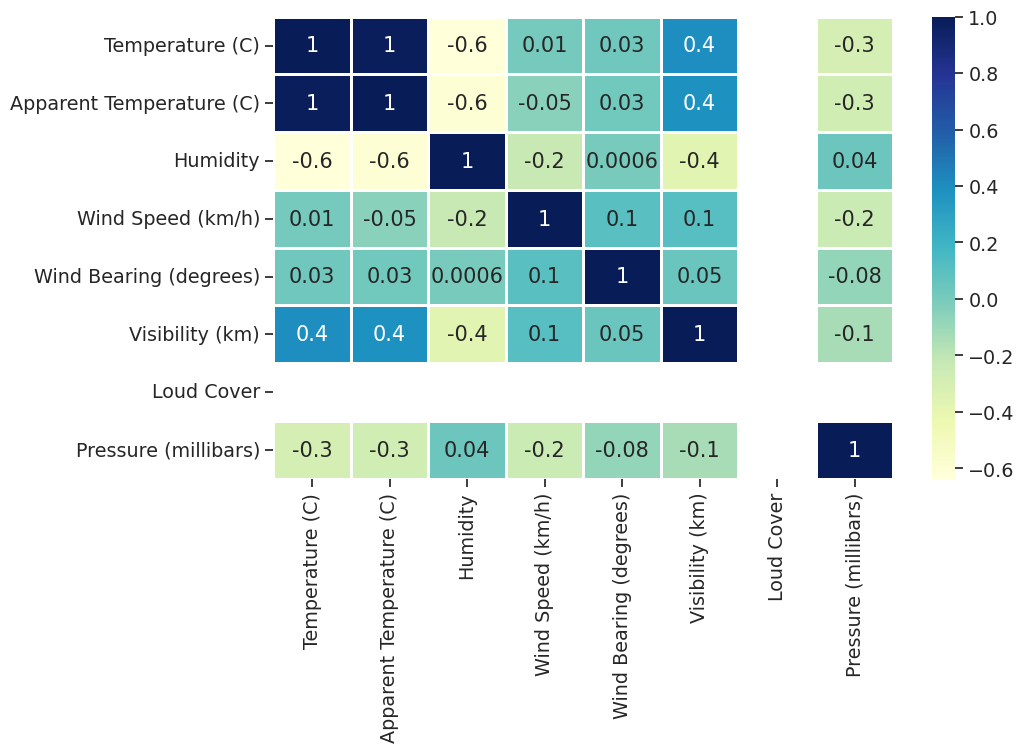

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_weather[conti_cols].corr(),
            annot=True,
            linewidths=1,
            fmt='.1g',
            cmap='YlGnBu')
plt.show()

In [30]:
profile_report = pandas_profiling.ProfileReport(df_weather)
profile_report.to_file('profile_report.html')
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **4. Data Preparation**

In [ ]:
# Since the `Apparent Temperature (C)` is highly correlated with `Temperature (C)`, we need to drop `Apparent Temperature (C)` before proceeding further.
df_weather.drop(columns=['Apparent Temperature (C)'], inplace=True)

In [ ]:
# Identifying and dropping variables with zero variance
data_summary = df_weather.describe()
zero_var_cols = data_summary.columns[data_summary.loc['std', :] == 0].tolist()
df_weather = df_weather.loc[:, df_weather.columns.difference(zero_var_cols)]
zero_var_cols

['Loud Cover']

In [ ]:
df_weather.columns

Index(['Humidity', 'Precip Type_snow', 'Pressure (millibars)',
       'Summary_Breezy and Dry', 'Summary_Breezy and Foggy',
       'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast',
       'Summary_Breezy and Partly Cloudy', 'Summary_Clear',
       'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle',
       'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'Temperature (C)', 'Visibility (km)', 'Wind Bearing (degrees)',
       'Wind Speed (km/h)'],
      dtype='object')

In [ ]:
features = df_weather.drop(columns=['Humidity']).columns.tolist()
print(features)

['Precip Type_snow', 'Pressure (millibars)', 'Summary_Breezy and Dry', 'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy', 'Summary_Clear', 'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy', 'Summary_Dry and Partly Cloudy', 'Summary_Foggy', 'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast', 'Summary_Humid and Partly Cloudy', 'Summary_Light Rain', 'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy', 'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry', 'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy', 'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy', 'Temperature (C)', 'Visibility (km)', 'Wind Bearing (degrees)', 'Wind Speed (km/h)']


In [ ]:
X = df_weather[features]
y = df_weather['Humidity']

# View the size of the arrays X and Y
print(X.shape)
print(y.shape)

(95912, 32)
(95912,)


## **4.b Train Test Split**

In [ ]:
data = df_weather.dropna()
X = data.drop(columns='Humidity')
y = data['Humidity']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (67138, 32)
X_test shape: (28774, 32)
y_train shape: (67138,)
y_test shape: (28774,)


# **PART-B**

# **1.(a.b) Model Building**

In [ ]:
algorithms = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest Regression", RandomForestRegressor(random_state=42)),
    ("Support Vector Regression", SVR())
]

Training Linear Regression
Linear Regression - Training MSE: 0.20
Linear Regression - Training RMSE: 0.44
Linear Regression - Training R2: 0.56
------------------------------
Linear Regression - Testing MSE: 0.20
Linear Regression - Testing RMSE: 0.45
Linear Regression - Testing R2: 0.56





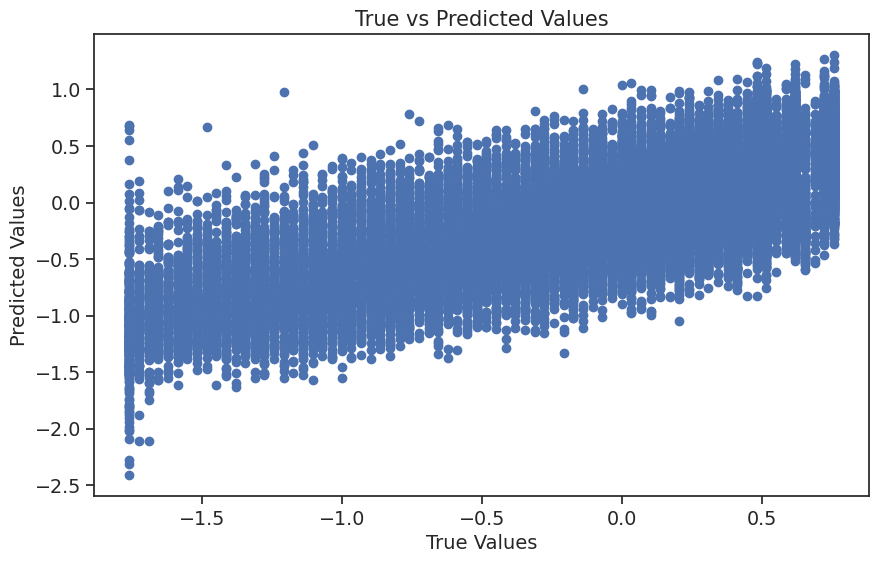

Training Random Forest Regression
Random Forest Regression - Training MSE: 0.02
Random Forest Regression - Training RMSE: 0.13
Random Forest Regression - Training R2: 0.96
------------------------------
Random Forest Regression - Testing MSE: 0.12
Random Forest Regression - Testing RMSE: 0.35
Random Forest Regression - Testing R2: 0.73





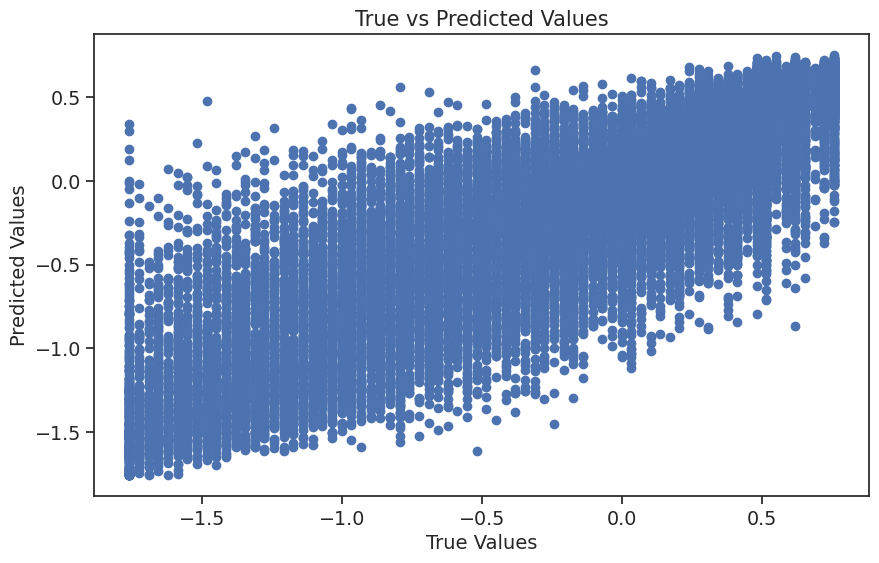

Training Support Vector Regression
Support Vector Regression - Training MSE: 0.14
Support Vector Regression - Training RMSE: 0.37
Support Vector Regression - Training R2: 0.69
------------------------------
Support Vector Regression - Testing MSE: 0.15
Support Vector Regression - Testing RMSE: 0.38
Support Vector Regression - Testing R2: 0.68





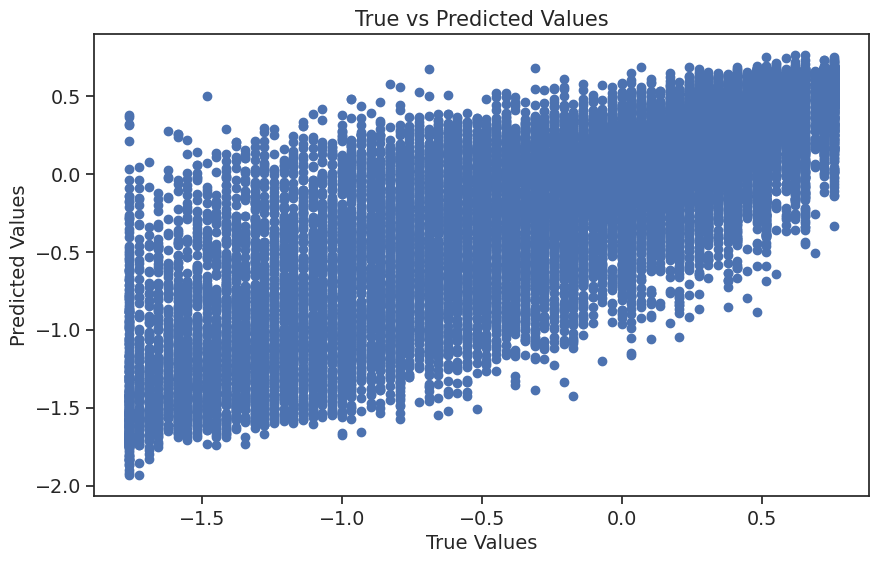

In [ ]:

models_comparison_train={}
for name, model in algorithms:
    print(f"Training {name}")

    # Fitting Model in Train Data
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)

    # Train Performance
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mse_train ** 0.5
    r2_train = r2_score(y_train, y_train_pred)

    # Predicting Values on Test data
    y_test_pred = model.predict(X_test)

    # Test Performance
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mse_test ** 0.5
    r2_test = r2_score(y_test, y_test_pred)

    print(f"{name} - Training MSE: {mse_train:.2f}")
    print(f"{name} - Training RMSE: {rmse_train:.2f}")
    print(f"{name} - Training R2: {r2_train:.2f}")
    print("-" * 30)
    print(f"{name} - Testing MSE: {mse_test:.2f}")
    print(f"{name} - Testing RMSE: {rmse_test:.2f}")
    print(f"{name} - Testing R2: {r2_test:.2f}")
    print("\n\n")

    # Creating a DataFrame to visualize the true and predicted values
    df_pred = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_test_pred})

    # Create a scatter plot using matplotlib
    plt.figure(figsize=(10, 6))
    plt.scatter(df_pred['True Values'], df_pred['Predicted Values'])
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs Predicted Values')
    plt.show()

    # Store data in models_comparision dictionary
    models_comparison_train[name] = [mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test]

# **2. Performance Evaluation**

**a. Confusion Matrix**: <br>
Since here we are building only regression models the confusion matrix can't be developed as it is applicable only for Classification models.

**b. Displaying the final results:**

In [41]:
models_com_df = pd.DataFrame(models_comparison_train).T
models_com_df.columns = [
    "MSE (Train)",
    "RMSE (Train)",
    "R2 (Train)",
    "MSE (Test)",
    "RMSE (Test)",
    "R2 (Test)",
]
models_com_df = models_com_df.sort_values(by = "RMSE (Train)", ascending = False)

# Formatting the value to 2 decimal places
models_com_df.style.format("{:.2}").background_gradient(cmap="YlGnBu")

In [42]:
end_time = time.time()
print(f'Total time to run the workbook : {(end_time - start_time)/60 :.3f} mins')

Total time to run the workbook : 14.758 mins
